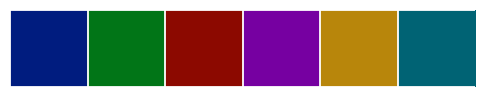

In [1]:
%matplotlib inline
import seaborn 
seaborn.set(
    context="talk", palette=seaborn.color_palette('dark')
)

from matplotlib import pylab
seaborn.palplot(
    seaborn.color_palette("dark")
)

In [2]:
import copy
import pathlib
import numpy as np

import pandas

from matplotlib import pylab

from multiprocessing import Pool

from kaskady2.analyze.profile import *
from kaskady2.analyze.fits import *
from kaskady2.analyze.profile_fits import *
from kaskady2.loader.reader import CascadeSetLoader



In [3]:
fits_dir = pathlib.Path("/tmp/fits-longitudinal")

fits_dir.mkdir(exist_ok=True)


In [4]:
fsm = FitSetManager.restore(
    "/home/jb/kaskady-data/results/profiles.bin", 
    index_attrs=('material', 'ecuts_kev', 'energy_mev'), 
    expected_params=["alpha", "beta", "delta", "gamma", "epsilon"]
)


In [11]:
MIN_ENERGY = 500
fsm.frame = fsm.frame.drop(fsm.frame[fsm.frame.energy_mev < 500].index)

fsm.frame.to_excel('/tmp/fits-long-energy-cut.xls')

In [6]:
def plot_parameter_dependence(param, frame, params): 

    pylab.clf() 
    series = frame[param]
    std = frame["sigma " + param]
    pylab.errorbar(
        np.asarray(series.index),
        np.asarray(series.values),
        yerr = np.asanyarray(std.values) * 2,  # 95 confidence interval
        fmt="o",
        label = "Dependence for {} with 95% confidence interval".format(param)
    )

    pylab.xlabel("$E_\gamma$ [MeV]")
    pylab.ylabel("Parameter value [rad. len.]")
    params['ecuts_mev'] = "{:.2f}".format(float(params['ecuts_kev'] / 1000))        
    pylab.title(
        "$E_{{c.o.}}={ecuts_mev}MeV$  "
        "Material: {material}".format(**params), fontsize=12)
    pylab.suptitle(
        "Energy dependence for {} in longitudinal profile fit".format(param), fontsize=18
    )
    file_name = str(fits_dir) + "/" + "-".join([param, params['ecuts_mev'], params['material']]) + '.png'
    pylab.legend()
#     print(file_name)
    pylab.savefig(file_name)

In [7]:
for par in fsm.make_param_plots(
    index_attrs=['material', 'ecuts_kev'], 
    parameters=["alpha", "beta", "delta", "gamma", "epsilon"]
): 
    plot_parameter_dependence(*par)

In [8]:
def plot_parameter_dependence_ecut(param, big_frame, params): 

    pylab.clf() 
    for ecut in big_frame.ecuts_kev.unique(): 
        frame = big_frame.loc[ecut]
        series = frame[param]
        std = frame["sigma " + param]
        pylab.errorbar(
            np.asarray(series.index),
            np.asarray(series.values),
            yerr = np.asanyarray(std.values) * 2,  # 95 confidence interval
            fmt="o",
            label = "Dependence for {param} $E_{{c.o.}}={ecut}$ with 95% confidence interval".format(
                param=param, ecut="{:.2f}".format(ecut/1000)
            )
        )

    pylab.xlabel("$E_\gamma$ [MeV]")
    pylab.ylabel("Parameter value [rad. len.]")        
    pylab.title(            
        "Material: {material}".format(**params), fontsize=12)
    pylab.suptitle(
        "Energy dependence for {} in longitudinal profile fit".format(param), fontsize=18
    )
    file_name = str(fits_dir) + "/" + "-".join(["all-cuts", param , params['material']]) + '.png'
    pylab.legend()
#     print(file_name)
    pylab.savefig(file_name)

In [9]:
for par in fsm.make_param_plots(
    index_attrs=['material'], 
    parameters=["alpha", "beta", "delta", "gamma", "epsilon"]
): 
    
    plot_parameter_dependence_ecut(*par)

TypeError: plot_parameter_dependence_ecut() missing 3 required positional arguments: 'param', 'big_frame', and 'params'